In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [39]:
# NOT REAL DATA/PREREQs
courses = {
    "BS 161": "Cell and Molecular Biology",
    "ENT 205": "Pests, Society and Environment",
    "IBIO 150": "Integrating Biology: From DNA to Populations",
    "MMG 141": "Introductory Human Genetics",
    "MMG 201": "Fundamentals of Microbiology",
    "PLB 105": "Plant Biology",
    "PSL 250": "Introductory Physiology",
    "BS 171": "Cell and Molecular Biology Laboratory",
    "CEM 161": "Chemistry Laboratory I",
    "CEM 162": "Chemistry Laboratory II",
    "PHY 191": "Physics Laboratory for Scientists I",
    "PHY 192": "Physics Laboratory for Scientists II",
    "PLB 106": "Plant Biology Laboratory",
    "CMSE 201": "Computational Modeling and Data Analysis I",
    "CMSE 381": "Fundamentals of Data Science Methods",
    "CMSE 382": "Optimization Methods in Data Science",
    "CMSE 495": "Experiential Learning in Data Science (W)",
    "CSE 232": "Introduction to Programming II",
    "CSE 300": "Social, Ethical, and Professional Issues in Computing",
    "CSE 331": "Algorithms and Data Structures",
    "CSE 380": "Information Management and the Cloud",
    "CSE 404": "Introduction to Machine Learning",
    "CSE 482": "Big Data Analysis",
    "CSE 480": "Database Systems",
    "MTH 314": "Matrix Algebra with Computational Applications",
    "STT 180": "Introduction to Data Science",
    "STT 380": "Probability and Statistics for Data Science",
    "CSE 402": "Biometrics and Pattern Recognition",
    "CSE 415": "Introduction to Parallel Computing",
    "CSE 431": "Algorithm Engineering",
    "CSE 440": "Introduction to Artificial Intelligence",
    "CMSE 401": "Methods for Parallel Computing",
    "CMSE 402": "Data Visualization Principles and Techniques",
    "CSE 471": "Media Processing and Multimedia Computing",
    "CSE 472": "Computer Graphics",
    "MTH 451": "Numerical Analysis I",
    "MTH 468": "Predictive Analytics",
    "STT 464": "Statistics for Biologists",
    "STT 465": "Bayesian Statistical Methods"
}

Prereqs = {
    "BS 161": [],
    "ENT 205": [],
    "IBIO 150": [],
    "MMG 141": [],
    "MMG 201": ['MMG 141'],
    "PLB 105": [],
    "PSL 250": [],
    "BS 171": [],
    "CEM 161": [],
    "CEM 162": ['CEM 161'],
    "PHY 191": [],
    "PHY 192": ['PHY 191'],
    "PLB 106": ['PHY 192'],
    "CMSE 201": [],
    "CMSE 381": ['CMSE 201', 'IBIO 150'],
    "CMSE 382": ['CMSE 381'],
    "CMSE 495": ['CMSE 382'],
    "CSE 232": ['CMSE 201'],
    "CSE 300": ['CSE 232'],
    "CSE 331": ['CSE 232'],
    "CSE 380": ['CSE 232'],
    "CSE 404": ['MTH 314', 'STT 380'],
    "CSE 482": ['MTH 314', 'STT 380', 'CSE 232'],
    "CSE 480": ['MTH 314', 'STT 380', 'CSE 232', 'CSE 380'],
    "MTH 314": ['CMSE 201'],
    "STT 180": [],
    "STT 380": ['STT 180'],
    "CSE 402": ['CSE 232'],
    "CSE 415": ['CSE 232', 'MTH 314'],
    "CSE 431": ['CSE 232'],
    "CSE 440": ['CSE 232', 'MTH 314'],
    "CMSE 401": ['CMSE 201'],
    "CMSE 402": ['CMSE 201'],
    "CSE 471": ['CSE 232'],
    "CSE 472": ['CSE 232', 'CSE 471'],
    "MTH 451": ['CMSE 201'],
    "MTH 468": ['CMSE 201', 'MTH 314'],
    "STT 464": ['STT 380'],
    "STT 465": ['STT 380']
}

courses_df = pd.DataFrame(list(courses.items()), columns=["Course Code", "Course Name"])
prereqs = pd.DataFrame(list(Prereqs.items()), columns=["Course Code", "Prereqs"])

In [44]:
def get_num(course_code):
    num = int(course_code.split()[1])
    return (num // 100) * 100

pos = {}
num_groups = {}

for _, course in enumerate(prereqs["Course Code"]):
    num = get_num(course)
    if num not in num_groups:
        num_groups[num] = []
    num_groups[num].append(course)

for x_index, (lvl, courses) in enumerate(sorted(num_groups.items())):
    for y_index, course in enumerate(courses):
        pos[course] = (x_index, -y_index)

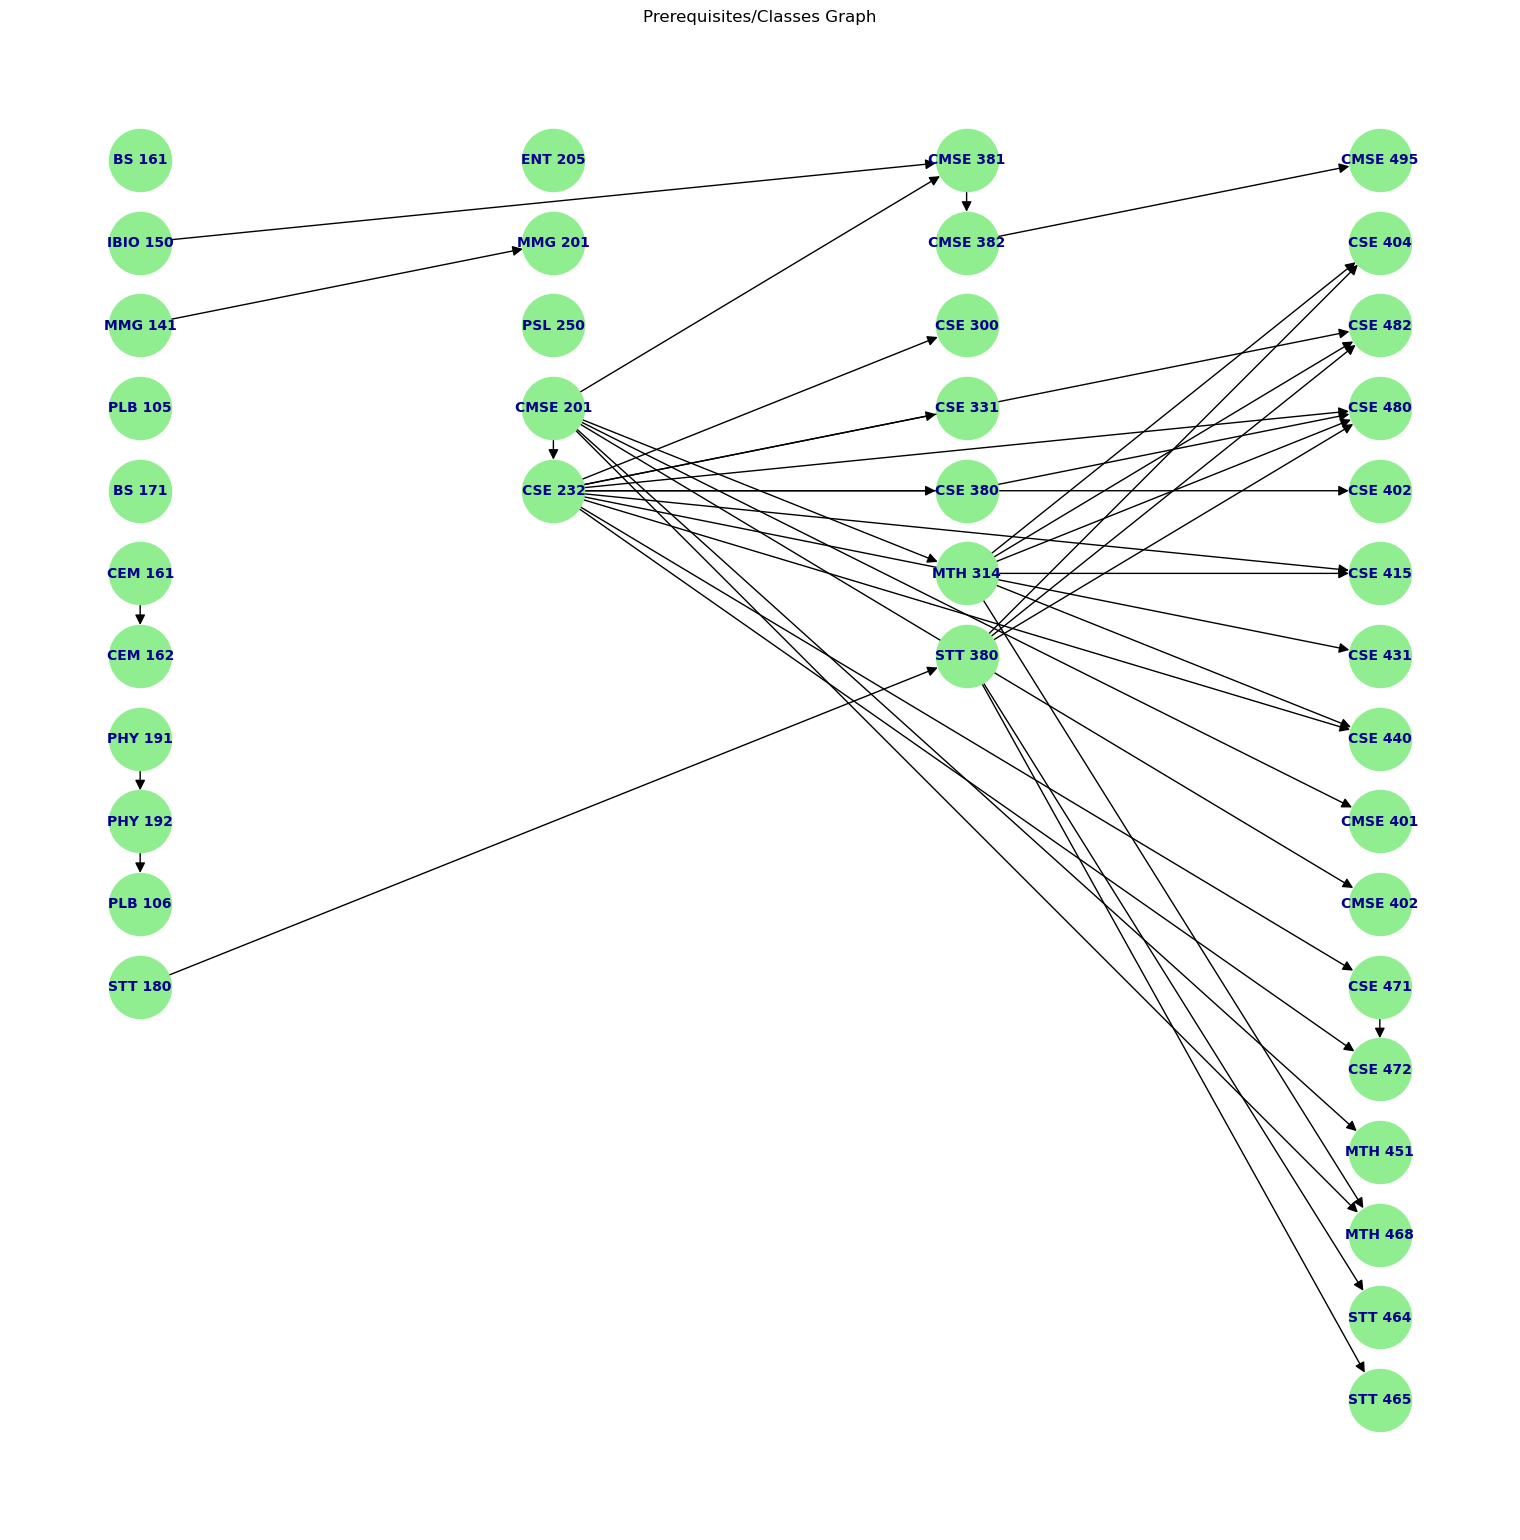

In [45]:
prereq_list=[]
for val in prereqs["Course Code"]:
    if len(prereqs.loc[prereqs["Course Code"] == val, "Prereqs"].values[0]) > 0:
        for i in range(0, len(prereqs.loc[prereqs["Course Code"] == val, "Prereqs"].values[0])):
            prereq_list.append((prereqs.loc[prereqs["Course Code"] == val, "Prereqs"].values[0][i], val))

Graph = nx.DiGraph()
for course_code in courses_df["Course Code"]:
    Graph.add_node(course_code)
Graph.add_edges_from(prereq_list)

plt.figure(figsize=(15, 15))
#pos = nx.random_layout(Graph) 
nx.draw(Graph, pos, with_labels=True, node_size=2000, node_color="lightgreen", font_size=10, font_weight="bold", font_color="darkblue", edge_color="black", arrowsize=15)
plt.title("Prerequisites/Classes Graph")
plt.show()